# 预测函数

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
 #n是特征的数量

In [9]:
#预测函数
def hypothesis(x,theta):
    z=X.dot(theta)
    g=1/(1+np.e**-z)
    return g

# 代价函数

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

In [10]:
#代价函数和梯度
def costFunction(theta,X,y):
    h=hypothesis(X,data)
    J=1.0/m*(-y.T.dot(log(h))-(1-y).T.dot(log(1-h)))
    grad=1.0/m*X.T.dot(h-y)
    return J,grad

In [11]:
#代价函数
def costfunction(theta,X,y):
    #样本数量
    m=y.size
    #参数拷贝
    tmp_theta=theta.reshape(x.shape[1],1).copy()
    #预测函数
    z=np.array(dot(X,tmp_theda))
    h=1.0/(1.0+np.e**-z)
    #代价函数
    J=1.0/m*(-y.T.dot(log(h))-(1-y).T.dot(log(1-h)))

    if np.isnan(J):
        return np.inf
    return J
#梯度
def gradient(theda,X,y):
    #样本数量
    m=y.size
    #参数的拷贝
    tmp_theta=theta.reshape(X.reshape[1],1).copy()
    #预测函数
    z=np.array(dot(X,tmp_theta))
    h=1.0/(1.0+np.e**-z)
    #梯度计算
    grad=1.0/m*X.T.dot(h-y)
    grad=grad.flatten()
    return grad

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

![%E5%9B%BE%E7%89%87.png](attachment:%E5%9B%BE%E7%89%87.png)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

#def loaddate
def loaddata(filename):
    file=open(filename)
    x=[]
    y=[]
    for line in file.readlines():
        line=line.strip().split()
        x.append([1,float(line[0]),float(line[1])])
        y.append(float(line[-1]))
    xmat=np.mat(x)
    ymat=np.mat(y).T
    file.close()
    return xmat,ymat
# w calc
def w_cal(xmat,ymat,alpha=0.001,maxIter=10001):
    W=np.mat(np.random.randn(3,1))
    w_save=[]
    for i in range(maxIter):
        H=1/(1+np.exp(-xmat*W))
        dw=xmat.T*(H-ymat)
        W-=alpha*dw
        if i%100==0:
            w_save.append([W.copy(),i])
    return W,w_save
#implement
xmat,ymat=loaddata('/content/drive/MyDrive/机器学习代码实例/ytb_lr.txt')
print(xmat.shape)
print(ymat.shape)
print(xmat)
print(ymat)

(10, 3)
(10, 1)
[[1. 2. 1.]
 [1. 2. 2.]
 [1. 5. 4.]
 [1. 4. 5.]
 [1. 2. 3.]
 [1. 3. 2.]
 [1. 6. 5.]
 [1. 4. 1.]
 [1. 6. 3.]
 [1. 7. 4.]]
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


[[-6.10084764]
 [ 0.83679533]
 [ 1.02436235]]
xmat: [[1. 2. 1.]
 [1. 2. 2.]
 [1. 5. 4.]
 [1. 4. 5.]
 [1. 2. 3.]
 [1. 3. 2.]
 [1. 6. 5.]
 [1. 4. 1.]
 [1. 6. 3.]
 [1. 7. 4.]]
ymat: [[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


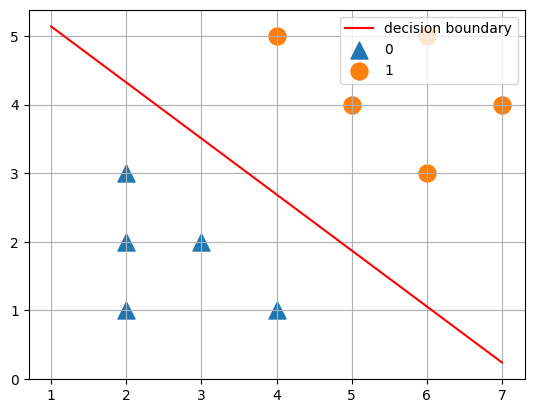

In [14]:
W,w_save = w_cal(xmat,ymat)
print(W)
print('xmat:',xmat)
print('ymat:',ymat)

# 基本展示
w0 = W[0,0]
w1 = W[1,0]
w2 = W[2,0]
plotx1 =  np.arange(1,7,0.001)
plotx2 = -w0 /w2 - w1/w2 * plotx1
plt.plot(plotx1,plotx2,c = 'r',label = 'decision boundary')

plt.scatter(xmat[:,1][ymat ==0].A,xmat[:,2][ymat ==0].A,marker='^',s = 150,label = 0)
plt.scatter(xmat[:,1][ymat ==1].A,xmat[:,2][ymat ==1].A,s = 150,label = 1)
plt.grid()
plt.legend()
plt.show()


In [15]:
for wi in w_save:
    plt.clf()
    w0 = wi[0][0,0]
    w1 = wi[0][1,0]
    w2 = wi[0][2,0]
    plotx1 =  np.arange(2,6,0.01)
    plotx2 = -w0 /w2 - w1/w2 * plotx1
    plt.plot(plotx1,plotx2,c = 'r',label = 'decision boundary')

    plt.scatter(xmat[:,1][ymat ==0].A,xmat[:,2][ymat ==0].A,marker='^',s = 150,label = 0)
    plt.scatter(xmat[:,1][ymat ==1].A,xmat[:,2][ymat ==1].A,s = 150,label = 1)
    plt.grid()
    plt.legend()
    plt.title('iter:%s'%np.str(wi[1]))
    plt.pause(0.001)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
from math import exp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [17]:
#data
def create_data():
    iris=load_iris()
    df=pd.DataFrame(iris.data,columns=iris.feature_names)
    df['label']=iris.target
    df.columns=['sepal length ','sepal width ','petal length ','petal width ','label']
    data=np.array(df.iloc[:100,[0,1,-1]])
    return data[:,:2],data[:,-1]

In [18]:
X,y=create_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [19]:
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [20]:
print(y)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


In [21]:
print(X_train)

[[4.4 3.2]
 [5.7 2.8]
 [5.4 3. ]
 [6.6 3. ]
 [5.1 3.8]
 [7.  3.2]
 [5.7 2.8]
 [4.8 3.4]
 [5.1 3.8]
 [6.7 3. ]
 [6.3 2.5]
 [5.6 2.7]
 [5.  3. ]
 [5.6 2.5]
 [4.6 3.1]
 [5.  3.2]
 [5.7 2.9]
 [4.9 3.1]
 [5.5 2.6]
 [5.6 3. ]
 [5.2 4.1]
 [4.8 3.4]
 [6.1 2.8]
 [4.9 3.1]
 [5.  3.4]
 [6.6 2.9]
 [5.  3.3]
 [5.7 4.4]
 [6.7 3.1]
 [5.1 3.5]
 [5.  2. ]
 [5.7 3.8]
 [5.4 3.9]
 [5.  3.4]
 [4.9 3. ]
 [5.5 2.4]
 [5.5 2.4]
 [5.6 3. ]
 [6.9 3.1]
 [5.1 3.3]
 [5.8 2.7]
 [4.9 2.4]
 [4.4 3. ]
 [6.  2.2]
 [5.1 3.8]
 [4.5 2.3]
 [6.3 3.3]
 [6.2 2.9]
 [4.8 3.1]
 [5.6 2.9]
 [5.4 3.9]
 [5.9 3.2]
 [5.4 3.7]
 [5.1 3.4]
 [5.  2.3]
 [6.1 2.9]
 [5.8 4. ]
 [4.8 3. ]
 [6.7 3.1]
 [4.3 3. ]
 [6.4 3.2]
 [5.3 3.7]
 [5.8 2.6]
 [5.2 2.7]
 [4.9 3.6]
 [5.5 2.5]
 [5.9 3. ]
 [5.1 3.7]
 [5.  3.5]
 [6.8 2.8]]


In [22]:
print(y_test)

[0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 0. 0.]


In [23]:
class LogisticRegressionClassifier:
    def __init__(self,max_iter=200,learning_rate=0.01):
        self.max_iter=max_iter
        self.learning_rate=learning_rate
    def sigmoid(self,x):
        return 1/(1+exp(-x))
    def data_matrix(self,x):
        data_mat=[]
        for d in X:
            data_mat.append([1.0,*d])
        return data_mat
    def fit(self,X,y):
        #label=np.mat(y)
        data_mat=self.data_matrix(X)
        self.weights=np.zeros((len(data_mat[0]),1),dtype=np.float32)

        for iter_ in range(self.max_iter):
            for i in range(len(X)):
                result=self.sigmoid(np.dot(data_mat[i],self.weights))
                error=y[i]-result
                self.weights+=self.learning_rate*error*np.transpose(
                                [data_mat[i]]                                   )
        print('LogisticRegression Model(learning_rate={},max_iter={})'.format(
            self.learning_rate, self.max_iter))

    # def f(self, x):
    #     return -(self.weights[0] + self.weights[1] * x) / self.weights[2]

    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)

In [24]:
lr_clf=LogisticRegressionClassifier()
lr_clf.fit(X_train,y_train)

LogisticRegression Model(learning_rate=0.01,max_iter=200)


In [25]:
lr_clf.score(X_test,y_test)

0.13

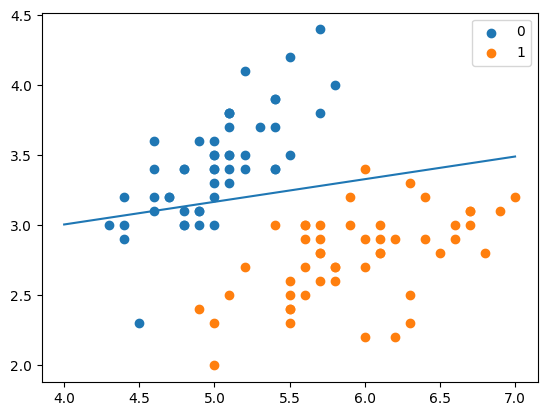

In [26]:
x_points=np.arange(4,8)
y_=-(lr_clf.weights[1]*x_points+lr_clf.weights[0])/lr_clf.weights[2]
plt.plot(x_points,y_)

#lr_clf.show_graph
plt.scatter(X[:50,0],X[:50,1],label='0')
plt.scatter(X[50:,0],X[50:,1],label="1")
plt.legend()

# scikit-learn实例

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf=LogisticRegression(max_iter=200)

In [29]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [30]:
clf.score(X_test,y_test)

1.0

In [31]:
print(clf.coef_, clf.intercept_)

[[ 2.72371165 -2.65446872]] [-6.46361369]


<ipython-input-32-60522a4622df>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
<ipython-input-32-60522a4622df>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')


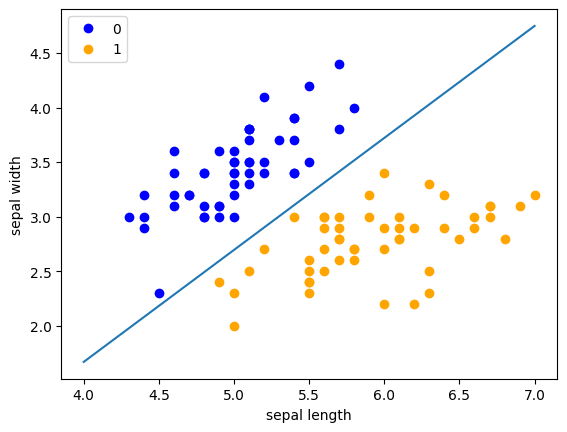

In [32]:
x_ponits = np.arange(4, 8)
y_ = -(clf.coef_[0][0]*x_ponits + clf.intercept_)/clf.coef_[0][1]
plt.plot(x_ponits, y_)

plt.plot(X[:50, 0], X[:50, 1], 'bo', color='blue', label='0')
plt.plot(X[50:, 0], X[50:, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()